# Introduction : Group 4
## Members:
* Shyam Akhil Nekkanti - 8982123
* Jun He (Helena) - 8903073
* Zheming Li (Brendan) - 8914152


In [72]:
## CHALLENGE #3

import pandas as pd
from tabulate import tabulate
import json

# Read category data from json
with open('./youtube-dataset/US_category_id.json', 'r') as file:
    categories = json.load(file)

# Step 1: Read data from CSV
df = pd.read_csv('youtube-dataset/USvideos.csv')  

# Step 2: Prettify the DataFrame using the tabulate library
print(tabulate(df.head(), headers='keys', tablefmt='pretty'))  # only display the first 5 rows for readability


# Convert categories json data to a hashmap so we can query category information by their ids
categoriesMap = {}

print("Imported Category data")
print(categories['items'])

for item in categories['items']:
    categoriesMap.setdefault(item['id'],item)

print("Categories hashmap")
print(categoriesMap)

+---+-------------+---------------+----------------------------------------------------------------+-----------------------+-------------+--------------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+--------+----------+---------------+------------------------------------------------+-------------------+------------------+------------------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [73]:
## CHALLENGE #4 
## Encapsulate the code in classes, methods
import pandas as pd
import matplotlib.pyplot as plt

class VideoAnalysis:
    def __init__(self, file_path):
        self.df = pd.read_csv(file_path)
    
    # Method to explore the dataset
    def explore_data(self):
        print("Column Names:", self.df.columns)
        print("Dataset Summary:\n", self.df.describe())



In [74]:
# Usage example:
# Step 1: Create an instance of the class
file_path = 'youtube-dataset/USvideos.csv'  
video_analysis = VideoAnalysis(file_path)

# Step 2: Call the method to explore the dataset
video_analysis.explore_data()

Column Names: Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')
Dataset Summary:
         category_id         views         likes      dislikes  comment_count
count  40949.000000  4.094900e+04  4.094900e+04  4.094900e+04   4.094900e+04
mean      19.972429  2.360785e+06  7.426670e+04  3.711401e+03   8.446804e+03
std        7.568327  7.394114e+06  2.288853e+05  2.902971e+04   3.743049e+04
min        1.000000  5.490000e+02  0.000000e+00  0.000000e+00   0.000000e+00
25%       17.000000  2.423290e+05  5.424000e+03  2.020000e+02   6.140000e+02
50%       24.000000  6.818610e+05  1.809100e+04  6.310000e+02   1.856000e+03
75%       25.000000  1.823157e+06  5.541700e+04  1.938000e+03   5.755000e+03
max       43.000000  2.252119e+08  5.613827e+06  1.674420e+0

## Challenge 5 - Write a 50-word summary of the use case
### This project uses the YouTube trending videos dataset to build a machine learning model 
### that predicts whether a video will trend based on features like views, likes, comments, 
### and video metadata. The use case is to help content creators optimize their video 
### attributes to increase their chances of appearing in the trending list.


In [75]:
## Challenge 5_1 - Calculate the mean, median, and mode in a way that makes sense
# Method to calculate the mean and median of views
import pandas as pd
from scipy import stats

## calculate the mean and median of views
mean_views = df['views'].mean()
median_views = df['views'].median()
print(f"Mean Views: {mean_views}")
print(f"Median Views: {median_views}")

## calculate the mode of category_id
mode_category = df['category_id'].mode()[0] 
print(f"Most Frequent Category ID (Mode): {mode_category}")



Mean Views: 2360784.6382573447
Median Views: 681861.0
Most Frequent Category ID (Mode): 24


## Challenge 5_2 -  Summary
We calculate the mean and median of views because views are directly tied to YouTuber income. These metrics help creators better understand and predict their potential earnings.

Mode
We chose to calculate the mode for category_id because category_id represents video categories (such as technology, news, sports, etc.). The mode of this feature can indicate which category of videos is most likely to trend.

In [76]:
## Challenge 6-1 - Calculate the variance standard deviation and four Quartiles in a way that makes sense
## calculate the four quartiles of views
variance_views = df['views'].var()
std_dev_views = df['views'].std()
print(f"Variance of Views: {variance_views}")
print(f"Standard Deviation of Views: {std_dev_views}")


## calculate the four quartiles of views         TODO
quartiles = df['views'].quantile([0.25, 0.5, 0.75, 1.0])
print("Quartiles for Views:")
print(f"Q1 (25%): {quartiles[0.25]}")
print(f"Q2 (50% - Median): {quartiles[0.5]}")
print(f"Q3 (75%): {quartiles[0.75]}")
print(f"Q4 (100% - Max): {quartiles[1.0]}")

Variance of Views: 54672918291443.13
Standard Deviation of Views: 7394113.75970394
Quartiles for Views:
Q1 (25%): 242329.0
Q2 (50% - Median): 681861.0
Q3 (75%): 1823157.0
Q4 (100% - Max): 225211923.0


## Challenge 6-2 - Summary

### *Variance & Standard Deviation*
### We calculate variance and standard deviation for views to measure how much the 
### view counts deviate from the average. This helps understand the level of 
### fluctuation in video popularity.

### *Four Quartiles*
### We use four quartiles for likes to divide the data into segments, providing  
### insights into how different videos perform in terms of user engagement. 
### Quartiles help show the range from the least liked to the most liked videos.


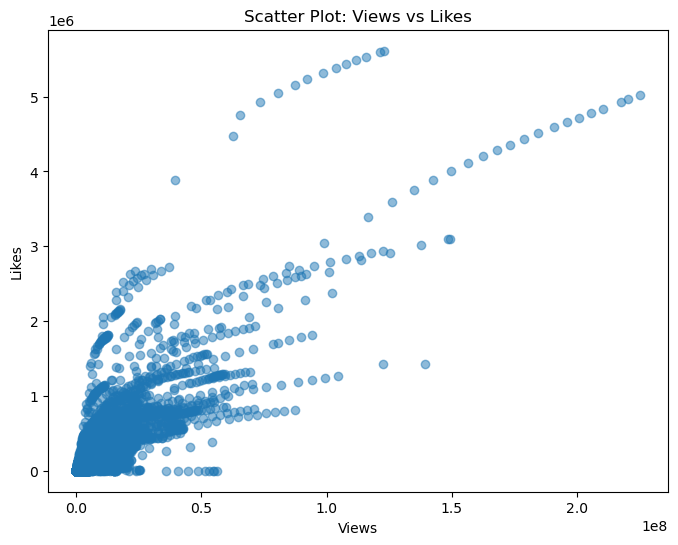

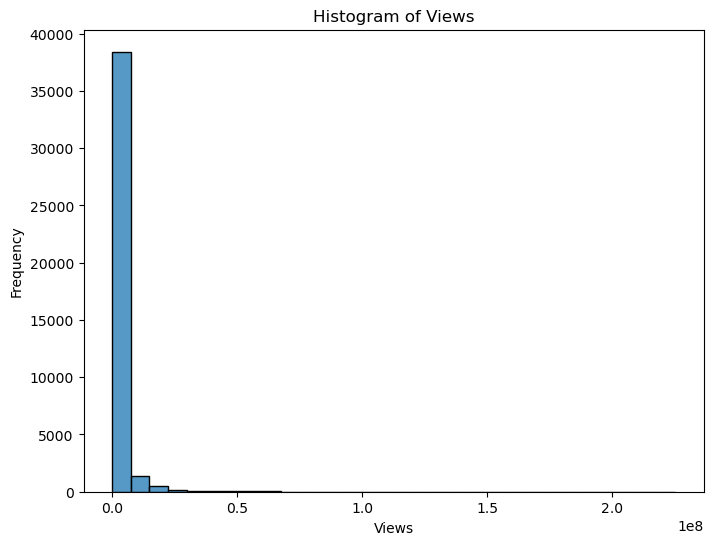

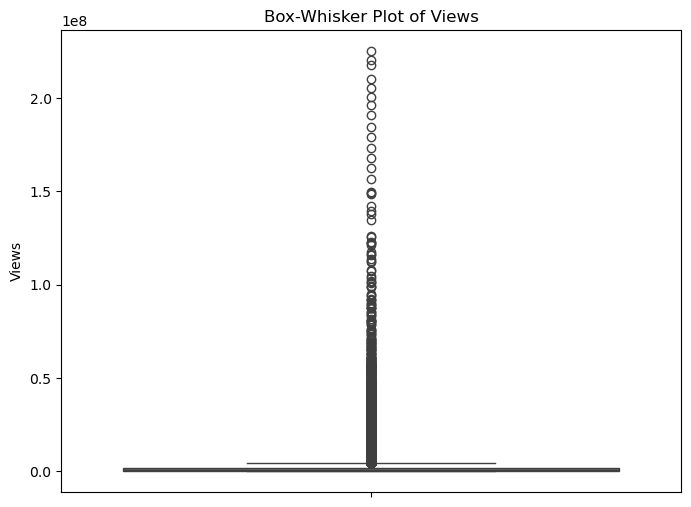

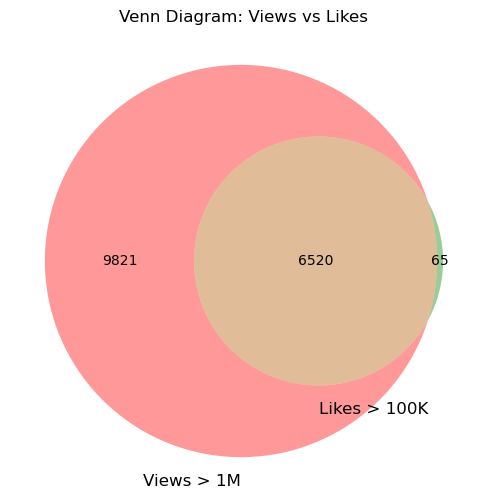

In [77]:
## Challenge 7-1 - Display the data with a scatter plot, a histogram, a box-whisker plot, and a Venn Diagram
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_venn import venn2, venn3  # For Venn diagrams


## display a scatter plot
plt.figure(figsize=(8,6))
plt.scatter(df['views'], df['likes'], alpha=0.5)
plt.title('Scatter Plot: Views vs Likes')
plt.xlabel('Views')
plt.ylabel('Likes')
plt.show()

## display a histogram
plt.figure(figsize=(8,6))
sns.histplot(df['views'], kde=False, bins=30)
plt.title('Histogram of Views')
plt.xlabel('Views')
plt.ylabel('Frequency')
plt.show()

## display a box-whisker plot
plt.figure(figsize=(8,6))
sns.boxplot(y=df['views'])
plt.title('Box-Whisker Plot of Views')
plt.ylabel('Views')
plt.show()

## display a Venn Diagram (example with 2 or 3 sets)
# Venn diagram for two groups: Views > 1M and Likes > 100K
views_set = set(df[df['views'] > 1_000_000].index)
likes_set = set(df[df['likes'] > 100_000].index)
plt.figure(figsize=(8,6))
venn2([views_set, likes_set], set_labels=('Views > 1M', 'Likes > 100K'))
plt.title('Venn Diagram: Views vs Likes')
plt.show()



## Challenge 7-2 - Present a numerical summary of the data

In [89]:
most_common_category = categoriesMap[f"{df['category_id'].mode().values[0]}"]["snippet"]["title"]
summary = pd.DataFrame({
    'Metric': [
        'Total Videos',
        'Average Views',
        'Median Views',
        'Average Likes',
        'Median Likes',
        'Average Comments',
        'Median Comments',
        'Most Common Category'
    ],
    'Value': [
        len(df),
        f"{df['views'].mean():,.0f}",
        f"{df['views'].median():,.0f}",
        f"{df['likes'].mean():,.0f}",
        f"{df['likes'].median():,.0f}",
        f"{df['comment_count'].mean():,.0f}",
        f"{df['comment_count'].median():,.0f}",
        f"{most_common_category}"
    ]
})

print("Numerical Summary of YouTube Data:")
print(summary.to_string(index=False))

Numerical Summary of YouTube Data:
              Metric         Value
        Total Videos         40949
       Average Views     2,360,785
        Median Views       681,861
       Average Likes        74,267
        Median Likes        18,091
    Average Comments         8,447
     Median Comments         1,856
Most Common Category Entertainment
